## Index

[1. SGD Classifier](#sgd) <br>
$\;\;\;\;\;\;$[1.1 Confusion Matrix of SGD Classifier](#conf_sgd)<br>
$\;\;\;\;\;\;$[1.2 Precision and Recall Scores of SGD Classifier](#prec_sgd)<br>
$\;\;\;\;\;\;$[1.3 Harmonic Mean of the SGD Classifier Accuracies](#harm_sgd)<br>
$\;\;\;\;\;\;$[1.4 Precision-Recall Curve of SGD Classifier](#prcurve_sgd)<br>
$\;\;\;\;\;\;$[1.5 ROC Curve of SGD Classifier](#roc_sgd)<br>
[2. Random Forest Classifier](#forest)<br>
$\;\;\;\;\;\;$ [2.1 ROC Curve of Random Forest Classifier](#roc_forest)<br>
[3 SVC Classifier](#svc) <br>
$\;\;\;\;\;\;$[3.1 Confusion Matrix of SVC Algorithm and Plotting](#conf_svc)<br>

<blockquote><b> Yasin İnal </b> 
I've written the notebook below by the help of the book 'Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow' by Aurelion Geron <br>
Many parts of it are reorganized due to increase the readibility and many comments are added.</blockquote>

<blockquote>In this notebook, the already existing data of sklearn, 'MNIST' data, will be used. MNIST consists of about 70,000 images that are representing the drawings of primary school students. These are drawings of numbers from 0 to 9 and they are labeled with their actual values.

In [1]:
from sklearn.datasets import fetch_openml 
import numpy as np
import pandas as pd

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
data, target = mnist["data"], mnist["target"]

In [3]:
mnist["data"] # It consists of the bits of the images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

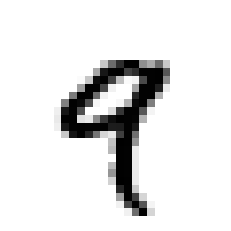

In [67]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 

def plot_image(image):
    some_digit = image 
    some_digit_image = some_digit.reshape(28, 28) 
    plt.imshow(some_digit_image, cmap="binary") 
    plt.axis("off") 
    plt.show()
    
plot_image(data[4])

In [68]:
target[4]

9

In [5]:
target = target.astype(np.uint8)

In [6]:
#Divide the 70,000 image into test and train sets (60,000-10,000)
data_train, data_test, target_train, target_test = data[:60000], data[60000:], target[:60000], target[60000:]

In [7]:
target_train_5 = (target_train == 5) # True for all 5s, False for all other digits 
target_test_5 = (target_test == 5)

<a id = "sgd"></a>
# SGD Classifier


Let's do a binary classifier by using SGD Classifier model


In [8]:
from sklearn.linear_model import SGDClassifier 

sgd_clf = SGDClassifier(random_state=42) 
sgd_clf.fit(data_train, target_train_5)

SGDClassifier(random_state=42)

In [9]:
sgd_clf.predict([data[60015]])

array([ True])

In [10]:
from sklearn.model_selection import cross_val_score 

cross_val_score(sgd_clf, data_train, target_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [11]:
from sklearn.model_selection import cross_val_predict 

target_train_pred = cross_val_predict(sgd_clf, data_train, target_train_5, cv=3)

target_train_pred

array([ True, False, False, ...,  True, False, False])

<a id = "conf_sgd"></a>
### Confusion Matrix of SGD Classifier

In [12]:
from sklearn.metrics import confusion_matrix 

confusion_matrix(target_train_5, target_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

<a id = "prec_sgd"></a>
### Precision and Recall Scores of SGD Classifier

In [13]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(target_train_5, target_train_pred)
recall = recall_score(target_train_5, target_train_pred)

precision, recall

(0.8370879772350012, 0.6511713705958311)

<a id = "harm_sgd"></a>
### Harmonic Mean of the SGD Classifier Accuracies 

In [14]:
from sklearn.metrics import f1_score

f1_score(target_train_5, target_train_pred)

0.7325171197343846

 
The Harmonic Mean of the SGD Classifier is `0.73`

Now let's find out the `decision function` of the model instead of `accuracy`

In [15]:
target_scores = cross_val_predict(sgd_clf, data_train, target_train_5, cv=3, method= "decision_function")

In [16]:
target_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

<a id = "prcurve_sgd"></a>
### Precision-Recall Curve of SGD Classifier

In [17]:
from sklearn.metrics import precision_recall_curve as prcurve

precision, recall, threshold = prcurve(target_train_5, target_scores)

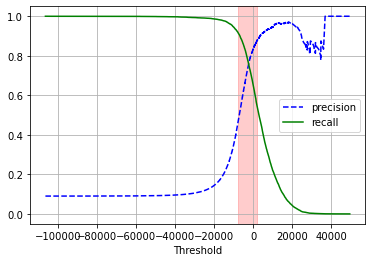

In [18]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    
    plt.legend(['precision','recall'])
    plt.grid()
    plt.xlabel("Threshold")
    plt.axvspan(-8000, 2000, color='red', alpha=0.2)
    
plot_precision_recall_vs_threshold(precision,recall,threshold)

In [19]:
optimum_threshold = threshold[np.argmax(precision+recall)] # find the optimum threshold for precision-recall
target_train_pred_arranged = (target_scores > optimum_threshold) # optimum_threshold is = -1991 

f1_score(target_train_5, target_train_pred_arranged) # harmonic mean of the accuracy

0.7589530378909571

<blockquote> The harmonic mean of the accuracy is increased by <code>0.025</code> point by arranging precision and recall.

<a id = "roc_sgd"></a>
### ROC Curve of SGD Classifier

In [20]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(target_train_5, target_scores)

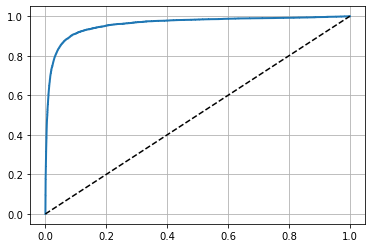

In [21]:
def plot_roc(fpr,tpr,label=None):
    plt.plot(fpr,tpr, linewidth="2" , label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.grid()
    plt.xlabel(label)
    
plot_roc(fpr,tpr)

<a id = "forest"></a>
# Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
target_probas_predict = cross_val_predict(rfc, data_train, target_train_5, cv=3, method="predict_proba")

In [23]:
target_probas_predict

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

<a id = "roc_forest"></a>
### ROC Curve of Random Forest Classifier

In [24]:
target_scores_forest = target_probas_predict[:,1] # score = proba of positive class

fpr_forest, tpr_forest, thresholds_forest = roc_curve(target_train_5, target_scores_forest)

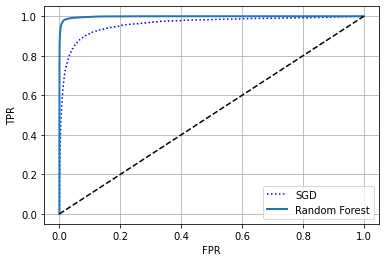

In [25]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc= "lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [26]:
from sklearn.metrics import roc_auc_score

roc_auc_score(target_train_5, target_scores_forest)

0.9983436731328145

<code>0.99</code> refers to precision score of the SVC algorithm.

<a id = "svc"></a>
# SVC Classifier

<blockquote>This time I have used test set for predictions.

In [27]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(data_train, target_train) # y_train, not y_train_5

SVC()

The Support Vector Machine algorithm is trained by one-versus-one (OvO) strategy automatically. In this way, we can do more than binary classifying.

In [73]:
svm_clf.predict(data_test[[0]])

array([7], dtype=uint8)

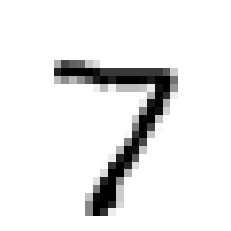

In [74]:
plot_image(data_test[0])

In [75]:
score_without_scaler = cross_val_score(sgd_clf, data_test, target_test, cv=3, scoring="accuracy")
score_without_scaler

array([0.82783443, 0.85448545, 0.8919892 ])

In [78]:
score_without_scaler.mean()

0.8581030268593747

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_test_scaled = scaler.fit_transform(data_test.astype(np.float64))

score_with_scaler = cross_val_score(sgd_clf, data_test_scaled, target_test, cv=3, scoring="accuracy")
score_with_scaler

array([0.86412717, 0.89708971, 0.89528953])

In [77]:
score_with_scaler.mean()

0.8855021374962931

<blockquote>While the score was <code>0.85</code> without standard scaling, it has increased to <code>0.88</code> with a very simple operation.

<blockquote> Another point is that, since the accuracy would be <code>0.10</code> on the random prediction. <code>0.88</code> is a very good prediction.

In [80]:
target_test_pred = cross_val_predict(sgd_clf, data_test_scaled, target_test, cv=3)

In [81]:
target_test_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

<a id = "conf_svc"></a>
### Confusion Matrix of SVC Algorithm and Plotting

In [82]:
conf_mx = confusion_matrix(target_test, target_test_pred)
conf_mx

array([[ 933,    0,    9,    3,    3,   15,    8,    1,    7,    1],
       [   0, 1065,   10,    4,    0,    7,    3,    3,   42,    1],
       [   5,    6,  885,   19,   29,    8,   15,   13,   48,    4],
       [   2,    1,   30,  864,    0,   47,    4,   14,   31,   17],
       [   2,    3,   15,    0,  863,    3,   12,   13,   25,   46],
       [   8,    4,    5,   33,   23,  735,   12,    9,   44,   19],
       [  10,    4,   13,    1,   17,   29,  873,    2,    9,    0],
       [   6,    7,   18,    8,    9,    3,    0,  918,    8,   51],
       [   4,    4,   14,   20,    7,   37,    7,   10,  855,   16],
       [   7,    4,    6,   12,   34,    7,    0,   50,   25,  864]],
      dtype=int64)

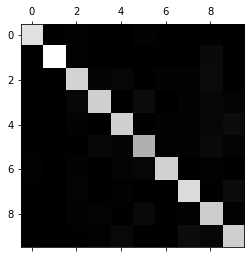

In [83]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [84]:
row_sum = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sum

<blockquote> I will make the main diagonal of the array 0. Because the values of the diagonal are so big and preventing us to make an eligible comparison between the other squares.

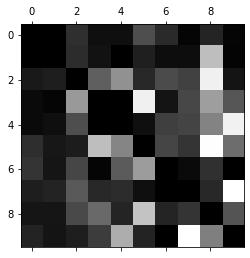

In [85]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap= plt.cm.gray)

<blockquote> This plotting shows that many numbers are considered as 8 even if they are not 8. Starting from here, specific arrangement might be done to increase the accuracy of the prediction of 8.